In [2]:
# ✅ Cell 1: Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Check shape
print("✅ Shape of features:", X.shape)
print("✅ Shape of target:", y.shape)


✅ Shape of features: (569, 30)
✅ Shape of target: (569,)


In [4]:
# ✅ Cell 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("✅ X_train shape:", X_train.shape)
print("✅ X_test shape:", X_test.shape)


✅ X_train shape: (455, 30)
✅ X_test shape: (114, 30)


In [8]:
from sklearn.metrics import r2_score


In [10]:
# ✅ Cell 3: Ridge Regression (Default Alpha)
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Predictions
y_pred = ridge_model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Ridge MSE:", mse)
print("✅ Ridge R2 Score:", r2)


✅ Ridge MSE: 0.05939807132270715
✅ Ridge R2 Score: 0.7471544923321645


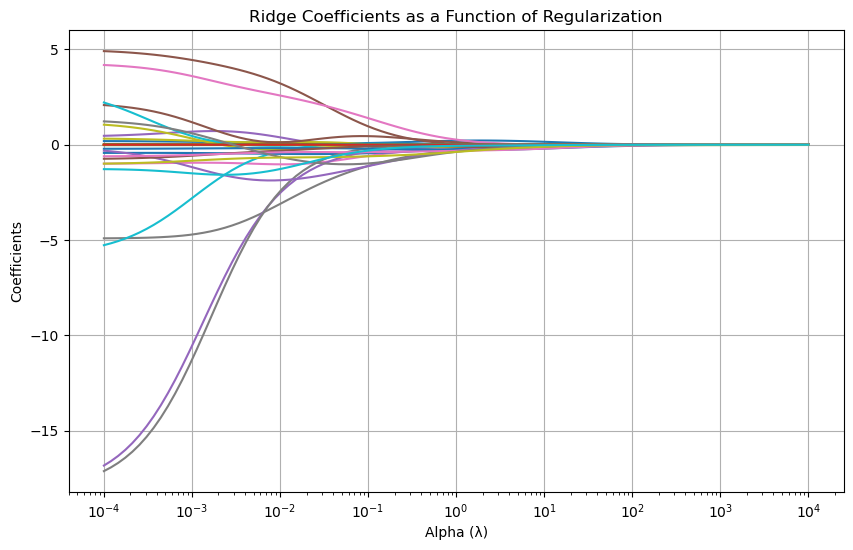

In [12]:
import matplotlib.pyplot as plt

alphas = np.logspace(-4, 4, 100)
coefs = []

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('Alpha (λ)')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a Function of Regularization')
plt.grid(True)
plt.show()
